In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [181]:
results = pd.read_csv('../data/processed/amyloid-hp.csv')
results

,Name,Created,State,best_train_f1,best_val_f1,best_val_precision,best_val_recall,test_f1,title_abstract_journal,weight_decay,...,train/loss,train_loss,eval/recall,eval/precision,eval/loss,eval/f1,eval/accuracy,change_classifier,num_attention_heads,model_type
0,microsoft/BiomedNLP-BiomedBERT-base-uncased-ab...,2025-08-13T07:12:42.000Z,finished,0.419512,0.372549,0.250000,0.730769,0.463158,NaN,0.05,...,0.2654,0.419510,0.384615,0.263158,0.677311,0.312500,0.860317,False,12,bert
1,cambridgeltl/SapBERT-from-PubMedBERT-fulltext_...,2025-08-12T23:21:45.000Z,finished,0.415929,0.400000,0.271429,0.760000,0.413043,NaN,0.05,...,0.3388,0.486229,0.680000,0.269841,0.416860,0.386364,0.828571,False,12,bert
2,cambridgeltl/SapBERT-from-PubMedBERT-fulltext_...,2025-08-13T06:51:10.000Z,finished,0.642336,0.567164,0.452381,0.760000,0.524590,NaN,0.05,...,0.3222,0.388067,0.760000,0.387755,0.415547,0.513514,0.885714,False,12,bert
3,cambridgeltl/SapBERT-from-PubMedBERT-fulltext_...,2025-08-13T00:13:49.000Z,finished,0.520710,0.408602,0.279412,0.760000,0.473684,NaN,0.05,...,0.2321,0.426030,0.760000,0.279412,0.450403,0.408602,0.825397,False,12,bert
4,allenai/biomed_roberta_base_lr1e-05_unfreeze2_...,2025-08-12T23:27:45.000Z,finished,0.438272,0.320000,0.213333,0.640000,0.426667,NaN,0.05,...,0.5818,0.667034,0.640000,0.213333,0.598578,0.320000,0.784127,False,12,roberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,microsoft/BiomedNLP-BiomedBERT-base-uncased-ab...,2025-08-14T07:54:01.000Z,finished,0.995122,0.500000,0.578947,0.440000,0.604651,False,0.10,...,0.0350,0.334453,0.440000,0.578947,1.127886,0.500000,0.930159,False,12,bert
236,allenai/biomed_roberta_base_lr1e-05_unfreeze12...,2025-08-12T23:46:37.000Z,finished,0.646465,0.447059,0.316667,0.760000,0.558824,NaN,0.05,...,0.2054,0.502160,0.760000,0.316667,0.644453,0.447059,0.850794,False,12,roberta
237,microsoft/BiomedNLP-BiomedBERT-base-uncased-ab...,2025-08-13T01:40:17.000Z,finished,0.933333,0.545455,0.631579,0.480000,0.500000,NaN,0.05,...,0.0384,0.347394,0.480000,0.631579,0.986451,0.545455,0.936508,False,12,bert
238,allenai/biomed_roberta_base_lr5e-06_unfreeze12...,2025-08-13T04:00:25.000Z,finished,0.437956,0.297521,0.187500,0.720000,0.436782,NaN,0.05,...,0.3767,0.590627,0.720000,0.187500,0.483272,0.297521,0.730159,False,12,roberta


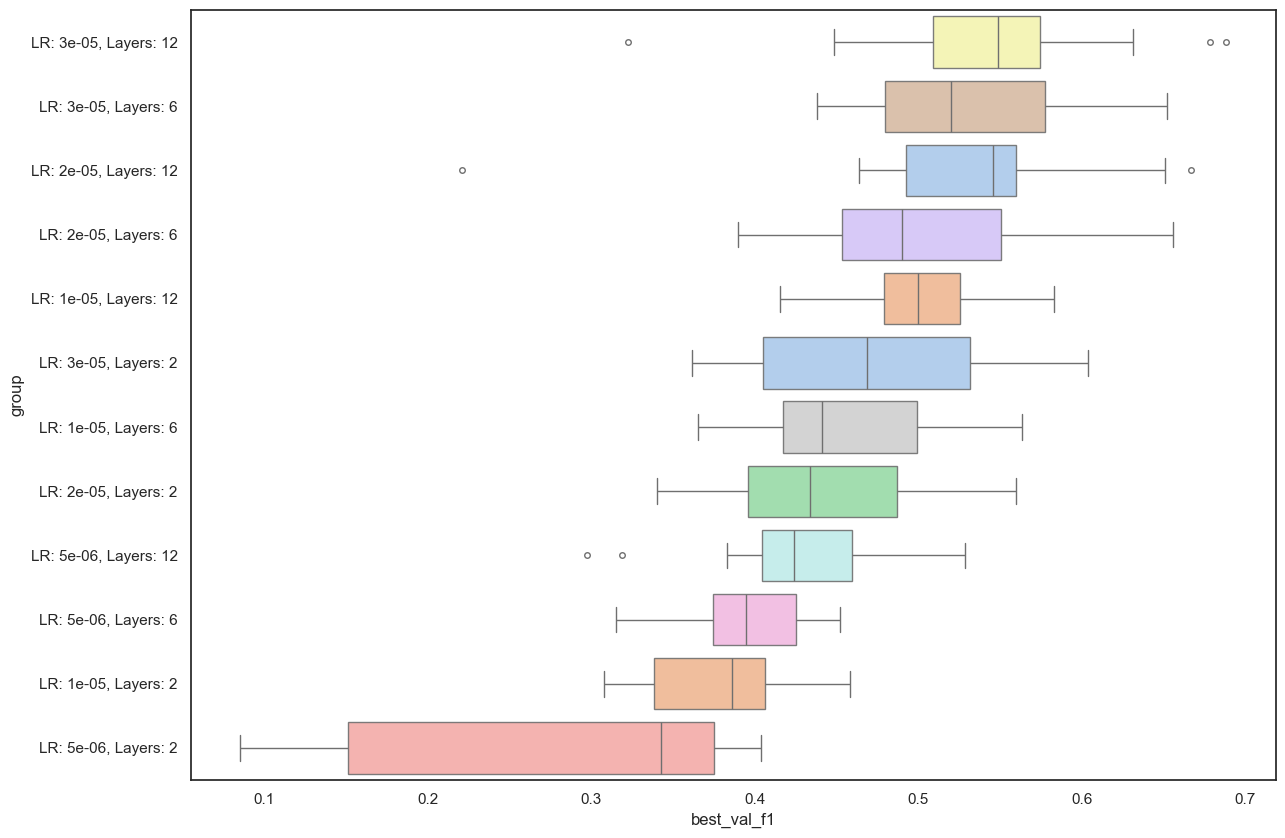

In [182]:

df = results.copy()
df['lr'] = df['learning_rate'].astype(str)
metric = 'best_val_f1'   


df['group'] = df.apply(
    lambda r: f"LR: {r['lr']}, Layers: {int(r['unfreeze_last_k_layers'])}",
    axis=1
)


group_order = (df.groupby('group')[metric]
                 .mean()
                 .sort_values(ascending=False)
                 .index
                 .tolist())


palette = sns.color_palette("pastel", n_colors=len(group_order))


plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df,
    y='group',
    x=metric,
    order=group_order,
    hue = 'group',
    palette=palette,
    fliersize=4,
    linewidth=1.0,
    whis=1.5,         
    boxprops=dict(alpha=0.9)
)

plt.show()


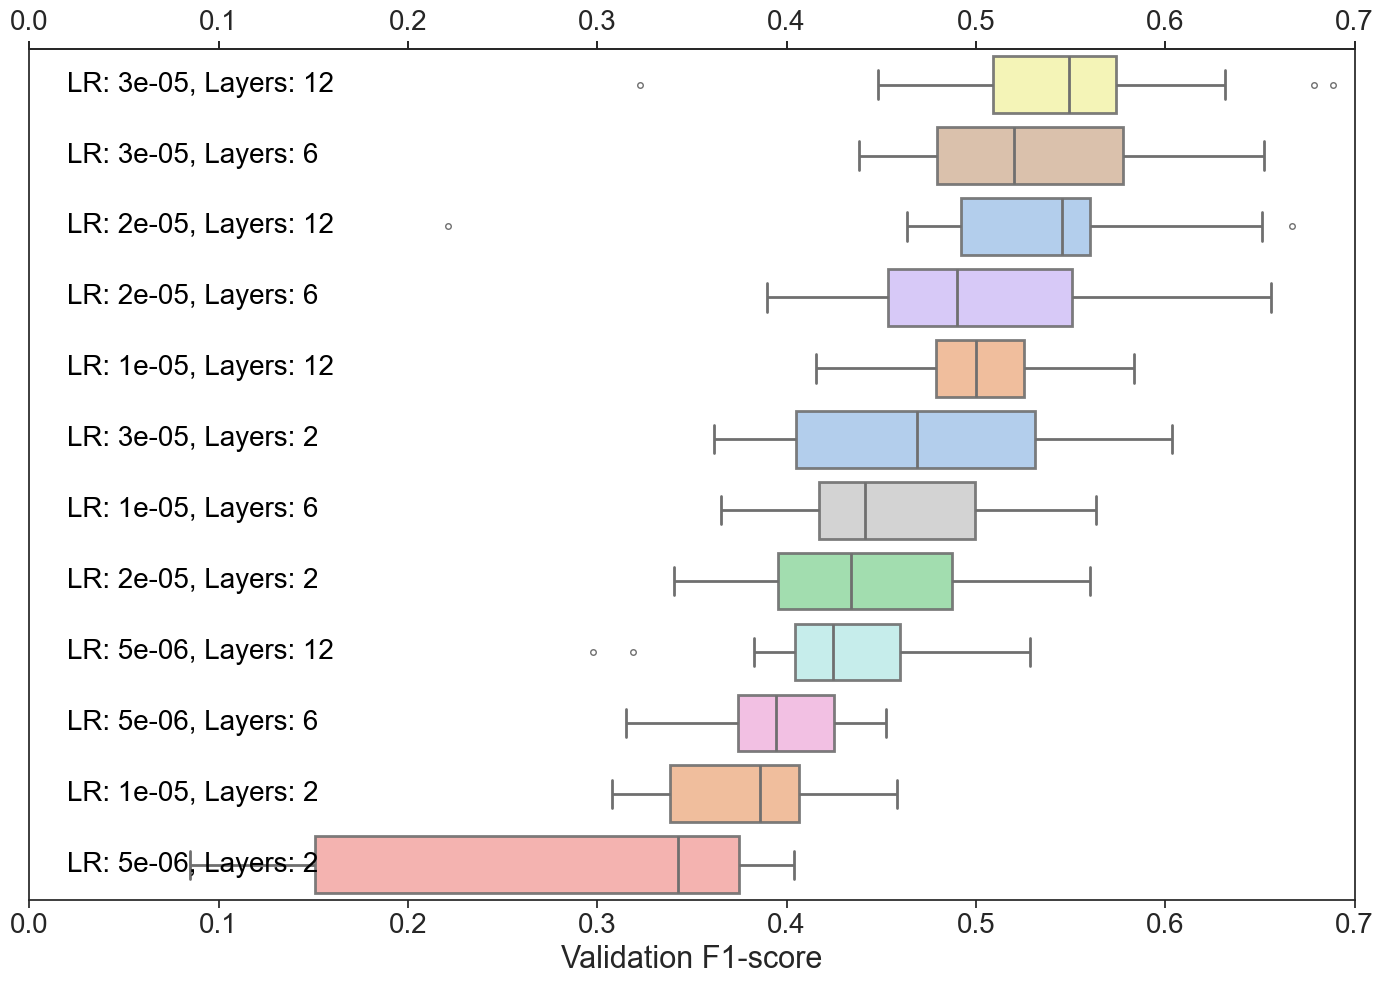

In [183]:
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df,
    y='group',
    x=metric,
    order=group_order,
    hue='group',
    palette=palette,
    fliersize=4,
    linewidth=2.0,
    whis=1.5,
    boxprops=dict(alpha=0.9)
)



for i, group in enumerate(group_order):
    y_pos = i
    x_pos = 0.02
    ax.text(
        x_pos, y_pos,
        group,
        va='center',
        ha='left',
        fontsize=20,
        color='black'
    )


ax.xaxis.set_ticks_position('both')   
ax.tick_params(axis='x', which='both', labelsize=20)

# TOP 
ax.xaxis.set_label_position('bottom')  
ax_top = ax.secondary_xaxis('top')     
ax_top.tick_params(axis='x', which='both', labelsize=20)


ax.set_yticklabels([])
ax.set_ylabel("")
ax.set_xlim((0, 0.7))

ax.set_xlabel("Validation F1-score", fontsize=22)
plt.tight_layout()
plt.show()


In [184]:

summary = df.groupby(['group'])['best_val_f1'].agg(
    mean='mean',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    std='std',
    count='count',
    min = "min",
    max='max'
).reset_index()
summary.sort_values(by="mean", ascending=False)

,group,mean,q1,q3,std,count,min,max
6,"LR: 3e-05, Layers: 12",0.542245,0.509091,0.574176,0.067515,35,0.322581,0.688525
8,"LR: 3e-05, Layers: 6",0.537216,0.479435,0.577778,0.063654,15,0.438356,0.652174
3,"LR: 2e-05, Layers: 12",0.531289,0.492308,0.560000,0.082493,25,0.221106,0.666667
5,"LR: 2e-05, Layers: 6",0.505505,0.453333,0.550725,0.064122,45,0.389610,0.655738
0,"LR: 1e-05, Layers: 12",0.504899,0.478819,0.525453,0.049790,15,0.415584,0.583333
7,"LR: 3e-05, Layers: 2",0.473895,0.404819,0.531348,0.079513,15,0.361446,0.603774
2,"LR: 1e-05, Layers: 6",0.452615,0.417289,0.499318,0.061537,15,0.365385,0.563380
4,"LR: 2e-05, Layers: 2",0.440913,0.395652,0.487059,0.062692,15,0.340426,0.560000
9,"LR: 5e-06, Layers: 12",0.426698,0.404509,0.459722,0.064486,15,0.297521,0.528736
11,"LR: 5e-06, Layers: 6",0.390329,0.374528,0.424953,0.044604,15,0.314961,0.452381


In [ ]:
# import wandb
# wandb.login(key="xxx")

In [ ]:


# api = wandb.Api()
# project_path = "Amyloid" 
# runs = api.runs(project_path)

# data = []

# for run in runs:
#     history = run.history(keys=["train/loss"])
#     train_loss_vector = history["train/loss"].tolist()
    
#     eval_history = run.history(keys=["eval/loss"])
#     eval_loss_vector = eval_history["eval/loss"].tolist()
    
#     model_name = run.config.get("_name_or_path", "unknown_model")
    
#     data.append({
#         "run_id": run.id,
#         "model_name": model_name,
#         "train_loss": train_loss_vector,
#         "eval_loss": eval_loss_vector
#     })

# df = pd.DataFrame(data)

In [185]:
df = pd.read_csv('../data/processed/amyloid-training-loss.csv')

In [186]:
df['train_loss'] = df['train_loss'].apply(eval)
name_map = {
    "allenai/biomed_roberta_base": "BioMed RoBERTa",
    "cambridgeltl/SapBERT-from-PubMedBERT-fulltext": "SapBERT",
    "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract": "BioMed BERT"
}

df['model_name'] = df['model_name'].map(name_map)


In [187]:
df

,Unnamed: 0,run_id,model_name,train_loss,eval_loss
0,0,lsxny4ml,SapBERT,"[0.6621, 0.6711, 0.6555, 0.6523, 0.6263, 0.579...","[0.5917563438415527, 0.5182483196258545, 0.434..."
1,1,04dr3ch4,SapBERT,"[0.8172, 0.7672, 0.7057, 0.6488, 0.6467, 0.629...","[0.5687233209609985, 0.47648102045059204, 0.42..."
2,2,8q8awhfo,SapBERT,"[0.7196, 0.7532, 0.7192, 0.656, 0.6412, 0.6482...","[0.5873844623565674, 0.4986746609210968, 0.471..."
3,3,hc9k4bg1,SapBERT,"[0.7958, 0.7445, 0.7557, 0.6422, 0.6984, 0.649...","[0.5756708383560181, 0.4744966924190521, 0.423..."
4,4,k15nvipl,SapBERT,"[0.7647, 0.7126, 0.7646, 0.6948, 0.6728, 0.606...","[0.5807885527610779, 0.4950336813926697, 0.446..."
...,...,...,...,...,...
235,235,2y8mtn5l,BioMed RoBERTa,"[0.7124, 0.7018, 0.6715, 0.7656, 0.6783, 0.621...","[0.6662799715995789, 0.46406400203704834, 0.37..."
236,236,59wxt809,BioMed RoBERTa,"[0.7433, 0.7074, 0.7086, 0.7166, 0.7308, 0.647...","[0.6685439944267273, 0.47489410638809204, 0.53..."
237,237,d8lih2l4,BioMed RoBERTa,"[0.6979, 0.7116, 0.6803, 0.7038, 0.6769, 0.786...","[0.6641314625740051, 0.4734606444835663, 0.855..."
238,238,02wxr3hg,BioMed RoBERTa,"[0.7598, 0.7281, 0.7038, 0.7039, 0.7537, 0.660...","[0.6684541702270508, 0.720276951789856, 0.4105..."


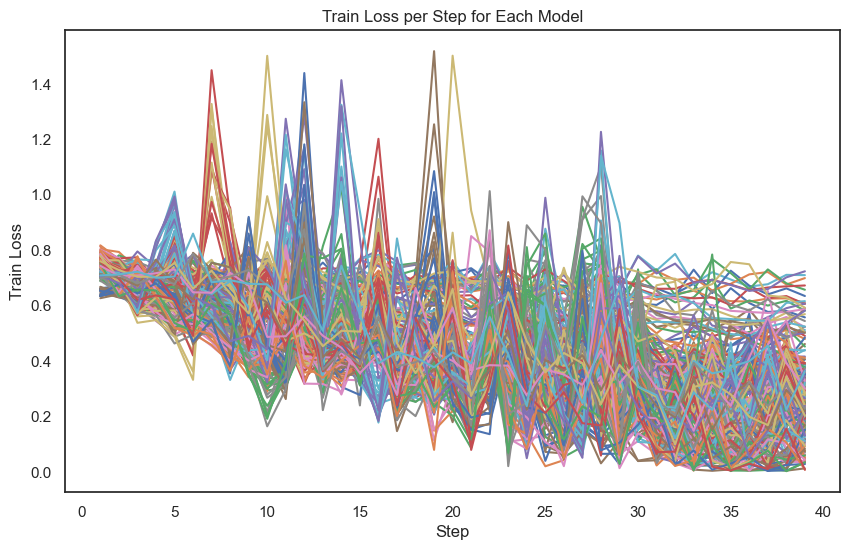

In [188]:
plt.figure(figsize=(10,6))

for _, row in df.iterrows():
    steps = range(1, len(row['train_loss']) + 1)
    plt.plot(steps, row['train_loss'])

plt.xlabel("Step")
plt.ylabel("Train Loss")
plt.title("Train Loss per Step for Each Model")
plt.show()


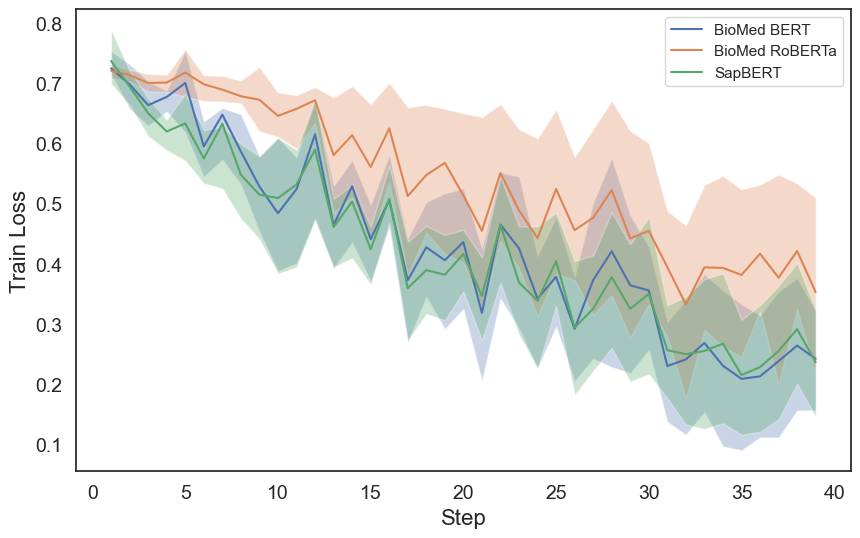

In [189]:

grouped = df.groupby('model_name')['train_loss'].apply(lambda x: np.vstack(x.values))

plt.figure(figsize=(10,6))

for model_name, losses_matrix in grouped.items():
    mean_loss = losses_matrix.mean(axis=0)
    q1 = np.percentile(losses_matrix, 25, axis=0)
    q3 = np.percentile(losses_matrix, 75, axis=0)
    steps = np.arange(1, losses_matrix.shape[1]+1)
    
    plt.plot(steps, mean_loss, label=model_name)
    plt.fill_between(steps, q1, q3, alpha=0.3)

plt.xlabel("Step", fontsize=16)           
plt.ylabel("Train Loss", fontsize=16)     
plt.xticks(fontsize=14)                   
plt.yticks(fontsize=14)                   
plt.legend()
plt.show()